# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [28]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


First, create some useful functions

In [29]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

Load the `fashion_mnist` dataset and normalize in the range [0, 1]

In [30]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the CNN and show its architecture

In [31]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(18, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(18, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(75, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 18)        468       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 18)        0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 18)        8118      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 18)          0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 32)          5216      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 32)          0   

Define some constants and train de CNN

In [32]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 34s 69ms/step - loss: 0.6635 - accuracy: 0.7597 - val_loss: 0.4410 - val_accuracy: 0.8420
Epoch 2/10
469/469 [==============================] - 39s 84ms/step - loss: 0.3954 - accuracy: 0.8562 - val_loss: 0.3633 - val_accuracy: 0.8688
Epoch 3/10
469/469 [==============================] - 40s 86ms/step - loss: 0.3354 - accuracy: 0.8776 - val_loss: 0.3312 - val_accuracy: 0.8795
Epoch 4/10
469/469 [==============================] - 41s 88ms/step - loss: 0.3001 - accuracy: 0.8900 - val_loss: 0.3097 - val_accuracy: 0.8872
Epoch 5/10
469/469 [==============================] - 42s 90ms/step - loss: 0.2760 - accuracy: 0.8999 - val_loss: 0.2985 - val_accuracy: 0.8895
Epoch 6/10
469/469 [==============================] - 41s 89ms/step - loss: 0.2580 - accuracy: 0.9051 - val_loss: 0.2893 - val_accuracy: 0.8970
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.2459 - accuracy: 0.9091 - val_loss: 0.2828 - val_accuracy:

Show the performance of the model

Test score: 0.27683326601982117
Test accuracy: 0.9035000205039978


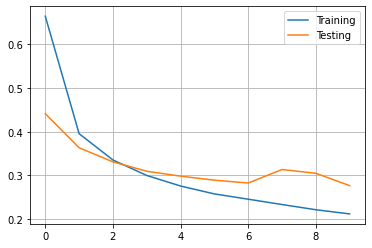

In [33]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

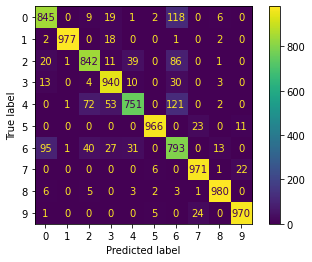

[0.85267407 0.98686869 0.85395538 0.90909091 0.81852861 0.97526502
 0.73698885 0.96186231 0.97609562 0.96854718]


In [34]:
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
cm = me.confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pl.show()

# Compute the F1 score for each class
f1_score = me.f1_score(y_test, pred, average=None)
print(f1_score)